<center><h1>Feature Selection </h1>
John Ignacio R.M. Nov 2020</center>

In [11]:
# Libraries
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada.data import read_dataset, split_dataset
from ada.model import BinaryClassifierModel4 as BC4
from ada.plot import plot_confidence_matrix
import pandas as pd

In [16]:
# Constants
source_path = "../../processed_data/xtohhOct2020"
dest_path = "../../saved_models/oct_2020"
signal = "Xtohh2000"
bg = "Xtohh_background"
seed = 420
region = "SR"
tag = 2
chi_feats = ["m_FJpt", 'm_hhm', 'm_DTpt', 'm_MET', 'm_bbttpt']
extrees_feats = ['m_hhm', 'm_FJm', 'm_DTm', 'm_FJpt', 'm_MET']

# Chi features

In [6]:
# Read dataset
df = read_dataset(source_path, signal, bg, region, tag, features = chi_feats)
df.head()

,EventWeight,label,m_FJpt,m_hhm,m_DTpt,m_MET,m_bbttpt
0,0.001020,1,885.55927,1631.6702,623.22710,237.88724,263.697630
1,0.001117,1,855.69904,1293.4028,449.37933,485.03333,463.512360
2,0.000925,1,552.47845,1659.8483,631.70496,104.55922,80.008150
3,0.001158,1,525.10590,1075.3092,416.48105,166.60722,109.524925
4,0.001120,1,916.44147,1595.7611,677.16440,167.35030,244.283460


In [7]:
# Splitting dataset
sets = split_dataset(df, 0.5, 0.3, 0.2, seed)

In [15]:
sets["x"]["train"]

,m_FJpt,m_hhm,m_DTpt,m_MET,m_bbttpt
0,0.827847,-1.593004,-1.574508,1.811293,1.989317
1,-2.090397,-2.616303,-0.848421,-1.554302,-1.425038
2,0.091487,-0.356872,0.024554,0.336859,-0.081265
3,-2.111163,0.131294,-0.557163,-1.260696,-1.576849
4,-1.701825,-1.239552,-1.494951,-0.376900,-0.502106
...,...,...,...,...,...
4020,1.002168,0.917756,1.504488,0.024455,0.141872
4021,0.251713,-1.488102,-1.582295,1.388175,1.407916
4022,1.111657,0.148405,0.022252,1.150312,0.802472
4023,2.497307,2.558575,1.776812,0.915044,0.560754


In [8]:
# Training
model = BC4(sets["x"]["train"].shape[1])
model.fit(
    sets["x"]["train"], sets["y"]["train"], sets["w"]["train"],
    sets["x"]["val"], sets["y"]["val"], sets["w"]["val"],
    50
)

Train on 4025 samples, validate on 3019 samples
Epoch 1/50
4025/4025 [==============================] - 1s 270us/step - loss: 5.7178e-04 - val_loss: 2.9655e-04
Epoch 2/50
4025/4025 [==============================] - 0s 49us/step - loss: 4.0790e-04 - val_loss: 2.6749e-04
Epoch 3/50
4025/4025 [==============================] - 0s 49us/step - loss: 3.8250e-04 - val_loss: 2.5039e-04
Epoch 4/50
4025/4025 [==============================] - 0s 52us/step - loss: 3.5067e-04 - val_loss: 2.4830e-04
Epoch 5/50
4025/4025 [==============================] - 0s 48us/step - loss: 3.3842e-04 - val_loss: 2.3265e-04
Epoch 6/50
4025/4025 [==============================] - 0s 48us/step - loss: 3.0220e-04 - val_loss: 2.4254e-04
Epoch 7/50
4025/4025 [==============================] - 0s 47us/step - loss: 2.5855e-04 - val_loss: 2.3991e-04
Epoch 8/50
4025/4025 [==============================] - 0s 48us/step - loss: 2.9554e-04 - val_loss: 2.1709e-04
Epoch 9/50
4025/4025 [==============================] - 0s 46us

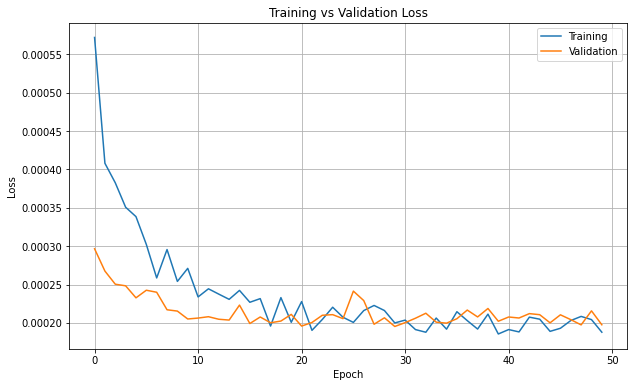

In [9]:
model.plot_loss()

Accuracy: 0.9428914229154415


,0,1,macro avg,weighted avg
precision,0.826914,0.967114,0.897014,0.943270
recall,0.840040,0.963968,0.902004,0.942891
f1-score,0.833425,0.965538,0.899482,0.943070
support,0.397218,1.938392,2.335610,2.335610


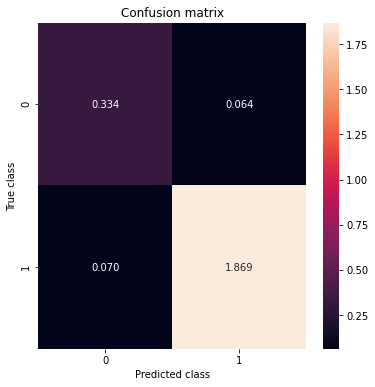

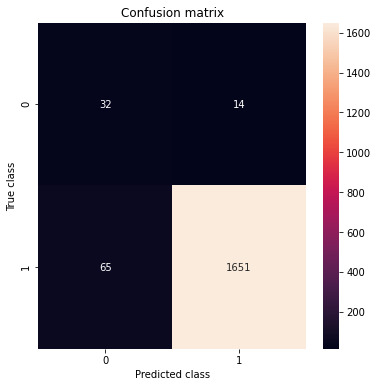

In [14]:
eval = model.complete_evaluation(
    sets["x"]["test"], sets["y"]["test"], sets["w"]["test"], 0.7
)
print("Accuracy:", eval["weighted_accuracy"])
display(pd.DataFrame(eval["weighted_class_report"]))
plot_confidence_matrix(eval["weighted_cm"], 6, 6, '.3f')
plot_confidence_matrix(eval["cm"], 6, 6, 'd')

# Extra trees

In [17]:
# Read dataset
df = read_dataset(source_path, signal, bg, region, tag, features = extrees_feats)
df.head()

,EventWeight,label,m_hhm,m_FJm,m_DTm,m_FJpt,m_MET
0,0.001020,1,1631.6702,127604.30,85368.720,885.55927,237.88724
1,0.001117,1,1293.4028,122862.90,55754.656,855.69904,485.03333
2,0.000925,1,1659.8483,109091.67,76213.550,552.47845,104.55922
3,0.001158,1,1075.3092,82382.28,58332.793,525.10590,166.60722
4,0.001120,1,1595.7611,115936.01,94135.960,916.44147,167.35030


In [18]:
# Splitting dataset
sets = split_dataset(df, 0.5, 0.3, 0.2, seed)
sets["x"]["train"]

,m_hhm,m_FJm,m_DTm,m_FJpt,m_MET
0,-1.593004,-0.191919,-0.547542,0.827847,1.811293
1,-2.616303,0.008585,-0.227130,-2.090397,-1.554302
2,-0.356872,-0.224844,-0.951311,0.091487,0.336859
3,0.131294,-0.577296,0.720116,-2.111163,-1.260696
4,-1.239552,-0.022834,-0.323814,-1.701825,-0.376900
...,...,...,...,...,...
4020,0.917756,0.287033,0.875852,1.002168,0.024455
4021,-1.488102,0.165451,-0.959552,0.251713,1.388175
4022,0.148405,0.615864,-0.723037,1.111657,1.150312
4023,2.558575,2.783586,0.079873,2.497307,0.915044


In [19]:
# Training
model2 = BC4(sets["x"]["train"].shape[1])
model2.fit(
    sets["x"]["train"], sets["y"]["train"], sets["w"]["train"],
    sets["x"]["val"], sets["y"]["val"], sets["w"]["val"],
    50
)

Train on 4025 samples, validate on 3019 samples
Epoch 1/50
4025/4025 [==============================] - 0s 93us/step - loss: 4.9290e-04 - val_loss: 2.3696e-04
Epoch 2/50
4025/4025 [==============================] - 0s 51us/step - loss: 3.3976e-04 - val_loss: 2.0489e-04
Epoch 3/50
4025/4025 [==============================] - 0s 51us/step - loss: 2.7387e-04 - val_loss: 1.9511e-04
Epoch 4/50
4025/4025 [==============================] - 0s 57us/step - loss: 2.4315e-04 - val_loss: 1.8173e-04
Epoch 5/50
4025/4025 [==============================] - 0s 62us/step - loss: 2.4342e-04 - val_loss: 1.6889e-04
Epoch 6/50
4025/4025 [==============================] - 0s 52us/step - loss: 2.0096e-04 - val_loss: 1.6434e-04
Epoch 7/50
4025/4025 [==============================] - 0s 52us/step - loss: 2.0803e-04 - val_loss: 1.5529e-04
Epoch 8/50
4025/4025 [==============================] - 0s 72us/step - loss: 1.8286e-04 - val_loss: 1.6043e-04
Epoch 9/50
4025/4025 [==============================] - 0s 55us/

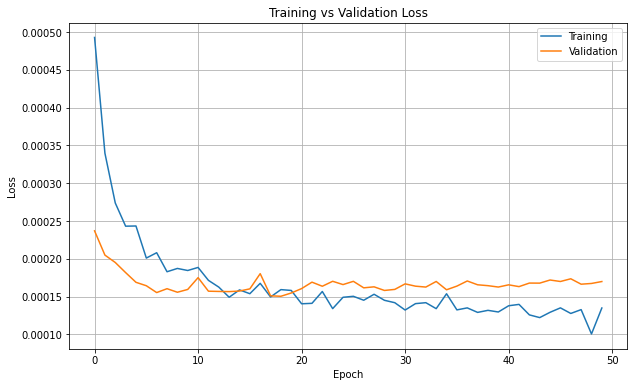

In [20]:
model2.plot_loss()

Accuracy: 0.949992857545798


,0,1,macro avg,weighted avg
precision,0.847479,0.971402,0.909441,0.950327
recall,0.860898,0.968250,0.914574,0.949993
f1-score,0.854136,0.969824,0.911980,0.950149
support,0.397218,1.938392,2.335610,2.335610


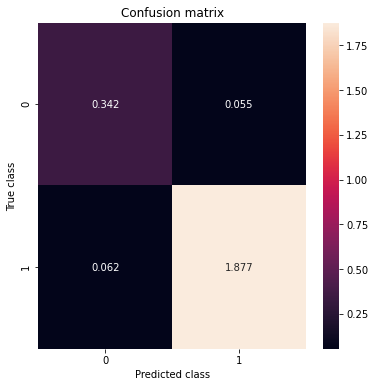

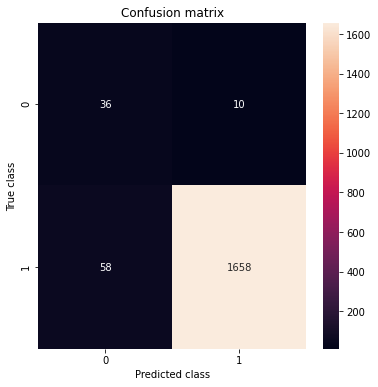

In [21]:
eval2 = model2.complete_evaluation(
    sets["x"]["test"], sets["y"]["test"], sets["w"]["test"], 0.7
)
print("Accuracy:", eval2["weighted_accuracy"])
display(pd.DataFrame(eval2["weighted_class_report"]))
plot_confidence_matrix(eval2["weighted_cm"], 6, 6, '.3f')
plot_confidence_matrix(eval2["cm"], 6, 6, 'd')